In [113]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import time
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.image as mpimg
from scipy.ndimage import filters
import urllib
from numpy import random
import sys
import pickle
import os
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
# Load the MNIST digit data
M = loadmat("mnist_all.mat")

In [114]:
def softmax(y):
    return exp(y) / tile(sum(exp(y), 0), (len(y), 1))

In [115]:
def cost_function(y, p):
    return -np.sum(y * np.log(p))

In [116]:
def part2(x, W0, b0):
    #this implementations concatenates the bias vector and the weights , and then outputs the result of dimension (10, 1)
    total_W0 = np.concatenate((b0, W0))
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    vals = softmax(np.dot(total_W0.T, total_x))
    return vals

def part3(x, y1, p):
    #print("P3", x.shape, y1.shape, p.shape)
    deriv = np.subtract(p, y1)
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    #print(deriv.shape, total_x.T.shape)
    deriv = np.matmul(deriv, total_x.T).T
    return deriv  # shape 784, 10

In [117]:
def get_data(M):
    train_keys = [key for key in M.keys() if "train" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        #print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y


def df(x, W0, y):
    # this W0 is assumed to have the bias incorperated into it
    W1, b0 = W0[:-1, :].reshape(784, W0.shape[1]), W0[-1, :].reshape(1, 10)
    #W1, b0 = W0[1:, :].reshape(784, W0.shape[1]), W0[0, :].reshape(1, 10)

    vals = part2(x, W1, b0)
    #print(vals.shape, "df")
    return part3(x, y, vals)

In [118]:
# PART ONE DATA SNIPPIT
# Load sample weights for the multilayer neural network
snapshot = pickle.load(open("snapshot50.pkl", "rb"), encoding="latin-1")
W0 = snapshot["W0"]  # data
b0 = snapshot["b0"].reshape((300, 1))  # bias?
W1 = snapshot["W1"]  # should be likelihoods?
b1 = snapshot["b1"].reshape((10, 1))  # classes?
#print(W0.shape)

np.random.seed(0)
weights = np.random.random(size=784*10).reshape((784, 10))
weights_bias = np.zeros(10).reshape(1, 10)
#np.random.random(size=10).reshape((1, 10))

# PART TWO - SINGLE LAYER NN
x = M["train5"][148:149].T
x = x / 255.
output = part2(x, weights, weights_bias)
# print(output)

# PART TWO - SINGLE LAYER NN
x = M["train5"][148:149].T / 255./ 255.
output = part2(x, weights, weights_bias)
output = output.reshape(10,1)
print(output.shape)
#print(output)
y = np.zeros((10, 1))
y[5, 0] = 1.
print(x.shape)

# PART THREE _ FINITE DIFFS
cost = cost_function(y, output)

h = 0.0001
#'''
for i in range(5):
    place = 215 + i
    weights2 = weights.copy()
    weights2[place, 5] += h
    output2 = part2(x, weights2, weights_bias)
    #print(output2)
    output2 = output2.reshape(10,1)
    cost2 = cost_function(y, output2)
    #print(cost, cost2)
    print("Finite Diff", (cost2 - cost) / h)
    real_diff = part3(x, y, output)
    print("Real Diff", real_diff[place+1, 5])
    #'''
    #break

(10, 1)
(784, 1)
Finite Diff -0.000844740868367
Real Diff -0.000844740871903
Finite Diff -0.00109400866588
Real Diff -0.00109400867017
Finite Diff -0.00109400866588
Real Diff -0.00109400867017
Finite Diff -0.00202183878528
Real Diff -0.00202183880816
Finite Diff -0.0024234368956
Real Diff -0.00242343692759


In [119]:
def grad_descent(df, x, y, W0, b0, alpha, EPS=1e-7, max_iter = 1000):
    # EPS = 1e-5   #EPS = 10**(-5)
    start = time.time()
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    #max_iter = 1000
    iter = 0
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        W1 -= alpha * df(x, W1, y)
        if iter % 100 == 0:
            print("Iter", iter)
            # print "x = (%.3f, %.3f, %.3f), f(x) = %.3f" % (t[0], t[1], t[2], f(x, y, t))
            # print "Gradient: ", df(x, y, t), "\n"
             # EPS = 1e-5   #EPS = 10**(-5)
            '''
            added_ones = np.ones((x.shape[1], 1))
            print(added_ones.shape, x.shape)
            #print(testX.shape, added_ones.T.shape)
            #totaltestX = np.vstack((testX, ))
            totaltestX = np.concatenate((x,added_ones.T), axis=0)
            print(totaltestX.shape)
            #print (final_weights.shape, totaltestX.shape)
            preds = np.matmul(totaltestX.T, W1)

            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            #how many of the hot keys match for validation
            print(y.T.shape, final_preds.shape)
            print(len(np.where((y.T == final_preds).all(axis =1)==True)[0]))
            '''
        iter += 1
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1


def part4(data, W0, b0, y, alpha=0.01, max_iter = 1000):
    np.random.seed(0)
    #alpha = 0.01
    final_weights = grad_descent(df, data, y, W0, b0, alpha, 1e-4, max_iter)
    return final_weights

In [120]:
##PART FOUR##
trainX, trainY = get_data(M)
print(np.where(trainX==np.nan))
trainX = trainX.T/255. /255.

print(trainX.shape, trainY.shape)
#use a subset to get faster results
trainX = trainX.T
trainX_small, trainX_large, trainY_small, trainY_large = train_test_split(trainX, trainY,
                                                  random_state = 0, stratify = trainY, test_size = 0.9)
trainX_small = trainX_small.T
print(trainX_small.shape, trainY_small.shape)
trainX = trainX.T
print("TrainX", trainX.shape)
np.random.seed(0)
weights = np.random.random(size=784*10).reshape((784, 10))
weights = np.ones_like(weights)
weights_bias = np.zeros(10).reshape(1, 10)

final_weights = part4(trainX_small, weights, weights_bias, trainY_small.T, alpha=1.5, max_iter=100)
#grad_descent(df, trainX, trainY, weights, weights_bias, 0.01)


(array([], dtype=int64), array([], dtype=int64))
(784, 60000) (60000, 10)
(784, 6000) (6000, 10)
TrainX (784, 60000)
Iter 0
Iter 100
Time taken: 5.135609149932861


(785, 10)


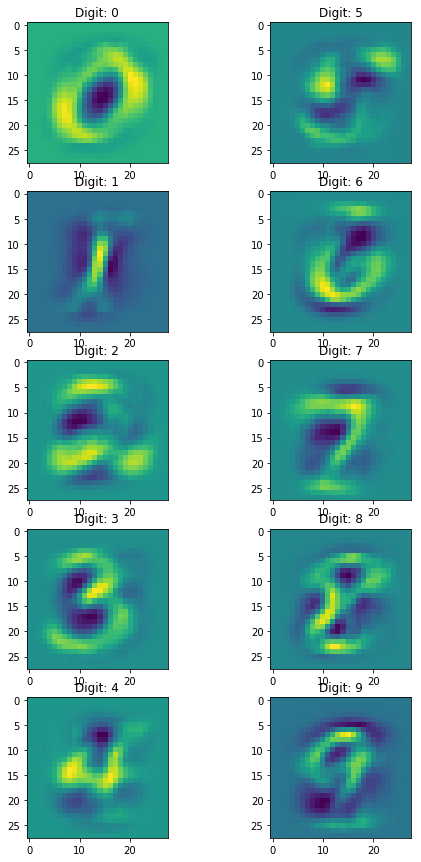

In [121]:
print(final_weights.shape)
#discard the last element, as that is the bias term
fig , ax= plt.subplots(5, 2, figsize=(8,15))
for i in range(10):
    #print(i//5, i%5)
    ax[i%5, i//5].imshow(final_weights[1:, i].reshape(28, 28))
    ax[i%5, i//5].set_title("Digit: {0}".format(i))
    # .title("Number {0}".format(i))
    #print(final_weights[100:110, i])
#plt.colorbar()
plt.show()

#rint(final_weights[:-1, 7])
#plt.imshow(final_weights[:-1, 7].reshape(28, 28))
#plt.show()

In [122]:
#plot learning curves
#collect testing data
def get_test_data(M):
    train_keys = [key for key in M.keys() if "test" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    print(data_length)
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y

testX, testY = get_test_data(M)
testX = testX/255./255.

10000
0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009


In [123]:
added_ones = np.ones((testX.shape[0], 1))
#print(testX.shape, added_ones.T.shape)
#totaltestX = np.vstack((testX, ))
totaltestX = np.concatenate((testX,added_ones), axis=1)
#print(totaltestX.shape)
#print (final_weights.shape, totaltestX.shape)
preds = np.matmul(totaltestX, final_weights)

preds_max =  preds.max(axis = 1)
final_preds = np.isin(preds, preds_max).astype(int)
#how many of the hot keys match for validation
print(testY.shape, final_preds.shape)
print(len(np.where((testY == final_preds).all(axis =1)==True)[0]))

(10000, 10) (10000, 10)
8573


Plot the learning curves with these set of parameters every 400 iterations, see how the performance changes

In [138]:
def grad_descent_learn(df, x, y, W0, b0, testX, testY, alpha, EPS=1e-7, max_iter = 1000):
    # EPS = 1e-5   #EPS = 10**(-5)
    start = time.time()
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    #max_iter = 1000
    iter = 0
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        W1 -= alpha * df(x, W1, y)
        if iter % 100 == 0:
            print("Iter", iter)
            added_ones = np.ones((x.shape[1], 1))
            totaltestX = np.concatenate((x,added_ones.T), axis=0)
            preds = np.matmul(totaltestX.T, W1)

            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            print(len(np.where((y.T == final_preds).all(axis =1)==True)[0]))
            
            added_ones = np.ones((testX.shape[1], 1))
            totaltestX = np.concatenate((testX,added_ones.T), axis=0)
            preds = np.matmul(totaltestX.T, W1)

            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            print(len(np.where((testY == final_preds).all(axis =1)==True)[0]))
            
        
        iter += 1
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1


def part4b(data, W0, b0, y, testX, testY ,  alpha=0.01, max_iter = 1000):
    np.random.seed(0)
    #alpha = 0.01
    final_weights = grad_descent_learn(df, data, y, W0, b0, testX, testY, alpha, 1e-4, max_iter)
    return final_weights

In [139]:
weights = np.random.random(size=784*10).reshape((784, 10))
weights = np.ones_like(weights)
weights_bias = np.zeros(10).reshape(1, 10)
#final_weights = part4(trainX_small, weights, weights_bias, trainY_small.T, alpha=1.5, max_iter=100)
print(trainX_small.shape, testX.shape)
final_weights2, performance_train, performance_test = part4b(trainX_small, weights, weights_bias, trainY_small.T, testX.T, testY, alpha = 1.0, max_iter=500)

(784, 6000) (10000, 784)
Iter 0
3680
6120
Iter 100
5024
8412
Iter 200
5163
8671
Iter 300
5241
8762
Iter 400
5288
8801
Iter 500
Time taken: 26.39473056793213


ValueError: too many values to unpack (expected 3)

In [16]:
plt.plot(iterations, performance_train[:-1], label = "training_scores")
plt.plot(iterations, performance_test[:-1], label = "testing_scores")
plt.xlabel("Iterations of Gradient Descent")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (65,) and (4,)

In [ ]:
#performance_train, performance_test

In [ ]:
#part 5, gradient descent with momentum